In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input,Model

In [2]:
df = pd.read_csv('df1204.csv')

In [3]:
fixed_control=[
 'topic_Electronic_music',
 'topic_Society',
 'topic_Sport',
 'topic_Food',
 'topic_Rhythm_and_blues',
 'topic_Independent_music',
 'topic_Humour',
 'topic_Racing_video_game',
 'topic_Knowledge',
 'topic_Politics',
 'topic_Video_game_culture',
 'topic_Reggae',
 'topic_Television_program',
 'topic_Baseball',
 'topic_Casual_game',
 'topic_Mixed_martial_arts',
 'topic_Health',
 'topic_Action_game',
 'topic_Basketball',
 'topic_Pet',
 'topic_Lifestyle_(sociology)',
 'topic_American_football',
 'topic_Religion',
 'topic_Soul_music',
 'topic_Music',
 'topic_Strategy_video_game',
 'topic_Classical_music',
 'topic_Fashion',
 'topic_Volleyball',
 'topic_Physical_fitness',
 'topic_Tourism',
 'topic_Rock_music',
 'topic_Music_video_game',
 'topic_Simulation_video_game',
 'topic_Cricket',
 'topic_Entertainment',
 'topic_Pop_music',
 'topic_Tennis',
 'topic_Action-adventure_game',
 'topic_Music_of_Asia',
 'topic_Hobby',
 'topic_Professional_wrestling',
 'topic_Puzzle_video_game',
 'topic_Jazz',
 'topic_Physical_attractiveness',
 'topic_Vehicle',
 'topic_Boxing',
 'topic_Business',
 'topic_Role-playing_video_game',
 'topic_Hip_hop_music',
 'topic_Motorsport',
 'topic_Christian_music',
 'topic_Association_football',
 'topic_Ice_hockey',
 'topic_Technology',
 'topic_Military',
 'topic_Film',
 'topic_Country_music',
 'topic_Performing_arts',
 'topic_Golf',
 'topic_Sports_game',
 'topic_Music_of_Latin_America',
 'year_2005',
 'year_2006',
 'year_2007',
 'year_2008',
 'year_2009',
 'year_2010',
 'year_2011',
 'year_2012',
 'year_2013',
 'year_2014',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'channel_year_1970',
 'channel_year_2005',
 'channel_year_2006',
 'channel_year_2007',
 'channel_year_2008',
 'channel_year_2009',
 'channel_year_2010',
 'channel_year_2011',
 'channel_year_2012',
 'channel_year_2013',
 'channel_year_2014',
 'channel_year_2015',
 'channel_year_2016',
 'channel_year_2017',
 'channel_year_2018',
 'channel_year_2019',
 'channel_year_2020',
 'channel_year_2021',
 'channel_year_2022',
 'channel_month_1',
 'channel_month_2',
 'channel_month_3',
 'channel_month_4',
 'channel_month_5',
 'channel_month_6',
 'channel_month_7',
 'channel_month_8',
 'channel_month_9',
 'channel_month_10',
 'channel_month_11',
 'channel_month_12',
 'dimension_2d',
 'dimension_3d',
 'definition_hd',
 'definition_sd',
 'country_AE',
 'country_AF',
 'country_AL',
 'country_AM',
 'country_AR',
 'country_AT',
 'country_AU',
 'country_AZ',
 'country_BA',
 'country_BD',
 'country_BE',
 'country_BG',
 'country_BH',
 'country_BM',
 'country_BO',
 'country_BR',
 'country_BY',
 'country_CA',
 'country_CH',
 'country_CL',
 'country_CN',
 'country_CO',
 'country_CR',
 'country_CY',
 'country_CZ',
 'country_DE',
 'country_DK',
 'country_DZ',
 'country_EC',
 'country_EE',
 'country_EG',
 'country_ES',
 'country_FI',
 'country_FR',
 'country_GB',
 'country_GE',
 'country_GH',
 'country_GL',
 'country_GR',
 'country_HK',
 'country_HR',
 'country_HU',
 'country_ID',
 'country_IE',
 'country_IL',
 'country_IN',
 'country_IR',
 'country_IS',
 'country_IT',
 'country_JM',
 'country_JO',
 'country_JP',
 'country_KE',
 'country_KH',
 'country_KR',
 'country_KW',
 'country_KY',
 'country_KZ',
 'country_LB',
 'country_LK',
 'country_LT',
 'country_LU',
 'country_LV',
 'country_MA',
 'country_MT',
 'country_MX',
 'country_MY',
 'country_NG',
 'country_NL',
 'country_NO',
 'country_NP',
 'country_NZ',
 'country_None',
 'country_OM',
 'country_PA',
 'country_PE',
 'country_PH',
 'country_PK',
 'country_PL',
 'country_PR',
 'country_PT',
 'country_QA',
 'country_RO',
 'country_RS',
 'country_RU',
 'country_SA',
 'country_SE',
 'country_SG',
 'country_SI',
 'country_SK',
 'country_SN',
 'country_SV',
 'country_TH',
 'country_TN',
 'country_TR',
 'country_TT',
 'country_TW',
 'country_TZ',
 'country_UA',
 'country_UG',
 'country_US',
 'country_UY',
 'country_UZ',
 'country_VG',
 'country_VN',
 'country_YE',
 'country_ZA',
 'country_ZW','colourfulness','contrast','saturation']

In [4]:
#split train, val, and test
train_text, temp_text, train_labels, temp_labels = train_test_split(df[fixed_control+['videoid','title','cover_word']], df['viewcount'], 
                                                                    test_size=0.2)

In [5]:
#construct cc embeddings
from transformers import BertTokenizer, BertModel, TFBertModel 

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [6]:
train_text['cover_word'] = train_text['cover_word'].fillna(' ')
temp_text['cover_word'] = temp_text['cover_word'].fillna(' ')

In [7]:
tokens_train_title = tokenizer(
    train_text['title'].tolist(),
    max_length = 22,
    pad_to_max_length=True,
    truncation=True,return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True
)

tokens_train_coverword = tokenizer(
    train_text['cover_word'].tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True,return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True
)

C:\Users\zhang\anaconda3\envs\tensorflow\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [8]:
tokens_test_title = tokenizer(
    temp_text['title'].tolist(),
    max_length = 22,
    pad_to_max_length=True,
    truncation=True,return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True
)

tokens_test_coverword = tokenizer(
    temp_text['cover_word'].tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True,return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True
)

In [9]:
yy = pd.DataFrame(np.log(train_labels+1))

In [10]:
yy_test=pd.DataFrame(np.log(temp_labels+1))

In [19]:
np.array(train_text.index)

array([30455, 51991, 20219, ..., 28728, 19541, 51254], dtype=int64)

In [ ]:
tokens_train_title

In [38]:
#input for title
input_ids_title = Input(shape=(22,), dtype=tf.int32, name="input_ids_title")
input_mask_title = Input(shape=(22,), dtype=tf.int32, name="attention_mask_title")
embeddings_title = bert(input_ids_title, attention_mask = input_mask_title)[0] 
embeddings_title = tf.keras.layers.GlobalMaxPool1D()(embeddings_title)
embeddings_title = tf.keras.layers.Dropout(0.1)(embeddings_title)
#input for word extracted from cover
input_ids_coverword = Input(shape=(20,), dtype=tf.int32, name="input_ids_coverword")
input_mask_coverword = Input(shape=(20,), dtype=tf.int32, name="attention_mask_coverword")
embeddings_coverword = bert(input_ids_coverword, attention_mask = input_mask_coverword)[0] 
embeddings_coverword = tf.keras.layers.GlobalMaxPool1D()(embeddings_coverword)
embeddings_coverword = tf.keras.layers.Dropout(0.1)(embeddings_coverword)
#input for video cc
embeddings_cc = Input(shape=(768,),name='input_embeddings_cc')
out_cc = tf.keras.layers.Dropout(0.1)(embeddings_cc)
out_cc = Dense(20, activation='relu')(out_cc)
out_cc =  tf.keras.layers.Normalization()(out_cc)

#input for other control x
embeddings_control = Input(shape=(len(fixed_control),),name='input_control')
out_control = tf.keras.layers.Normalization()(embeddings_control)
out_control = Dense(20, activation='relu')(out_control)
out_control =  tf.keras.layers.Normalization()(out_control)

#concatenate title and coverword
headlines = tf.keras.layers.Concatenate()([embeddings_title, embeddings_coverword])
headlines = Dense(20, activation='relu')(headlines)
headlines =  tf.keras.layers.Normalization()(headlines)

#compare headlines with videocc
distance = tf.keras.layers.Lambda(lambda x: (x[0]-x[1])**2)([headlines,out_cc])
distance = Dense(20, activation='relu')(distance)

#concatenate distance and other control x
allfeature = tf.keras.layers.Concatenate()([distance, out_control])
allfeature = tf.keras.layers.Concatenate()([allfeature, headlines])

#go through some hidden layers
allfeature = Dense(20,activation='relu')(allfeature)
allfeature = Dense(10,activation='relu')(allfeature)
output = Dense(1,activation='relu',name='output')(allfeature)

model = tf.keras.Model(inputs=[embeddings_cc,\
                               input_ids_title,\
                               input_mask_title,\
                               input_ids_coverword,\
                               input_mask_coverword,\
                               embeddings_control], outputs=output)

In [64]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids_title (InputLayer)   [(None, 22)]         0           []                               
                                                                                                  
 attention_mask_title (InputLay  [(None, 22)]        0           []                               
 er)                                                                                              
                                                                                                  
 input_ids_coverword (InputLaye  [(None, 20)]        0           []                               
 r)                                                                                               
                                                                                            

In [12]:
embeddings = np.load('all_embeddings.npy')
avgem = embeddings/10

In [39]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(
    learning_rate=5e-5, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    x = {'input_embeddings_cc':avgem[np.array(train_text.index),:],\
         'input_ids_title':tokens_train_title['input_ids'],\
         'attention_mask_title':tokens_train_title['attention_mask'],\
         'input_ids_coverword':tokens_train_coverword['input_ids'],\
         'attention_mask_coverword':tokens_train_coverword['attention_mask'],\
         'input_control':train_text[fixed_control]},
    y = yy,
    validation_split=0.1,
    epochs=30,
    batch_size=64,shuffle=True
)

Epoch 1/30
678/678 [==============================] - 116s 144ms/step - loss: 19.2655 - mae: 3.0129 - val_loss: 7.4637 - val_mae: 2.1053
Epoch 2/30
678/678 [==============================] - 94s 139ms/step - loss: 2.8904 - mae: 1.3307 - val_loss: 8.0864 - val_mae: 2.1991
Epoch 3/30
678/678 [==============================] - 94s 139ms/step - loss: 2.4302 - mae: 1.2225 - val_loss: 8.2891 - val_mae: 2.2263
Epoch 4/30
678/678 [==============================] - 94s 139ms/step - loss: 2.2194 - mae: 1.1714 - val_loss: 8.0997 - val_mae: 2.1946
Epoch 5/30
678/678 [==============================] - 94s 138ms/step - loss: 2.0966 - mae: 1.1385 - val_loss: 7.9431 - val_mae: 2.1738
Epoch 6/30
678/678 [==============================] - 95s 140ms/step - loss: 1.9989 - mae: 1.1107 - val_loss: 8.0404 - val_mae: 2.1870
Epoch 7/30
678/678 [==============================] - 94s 139ms/step - loss: 1.9491 - mae: 1.0982 - val_loss: 8.2780 - val_mae: 2.2226
Epoch 8/30
678/678 [==============================] -

KeyboardInterrupt: 

In [42]:
model.save('1204_1dnn.h5')

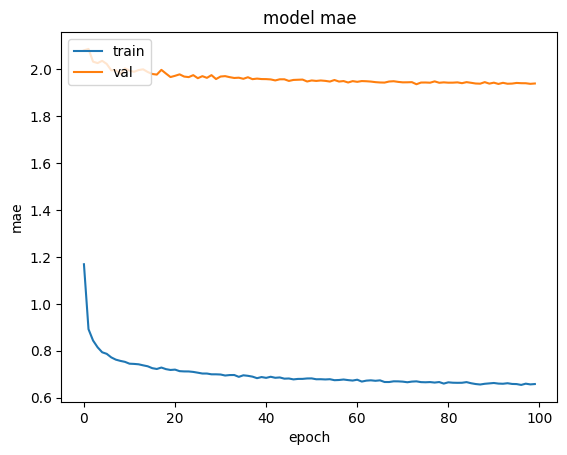

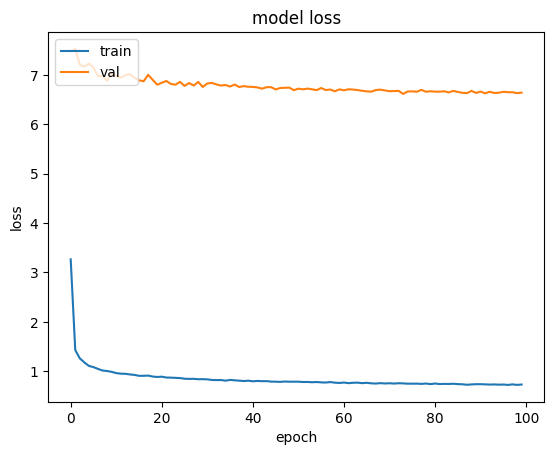

In [28]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
predicted = model.predict({'input_embeddings_cc':avgem[np.array(temp_text.index),:],\
         'input_ids_title':tokens_test_title['input_ids'],\
         'attention_mask_title':tokens_test_title['attention_mask'],\
         'input_ids_coverword':tokens_test_coverword['input_ids'],\
         'attention_mask_coverword':tokens_test_coverword['attention_mask'],\
         'input_control':temp_text[fixed_control]})

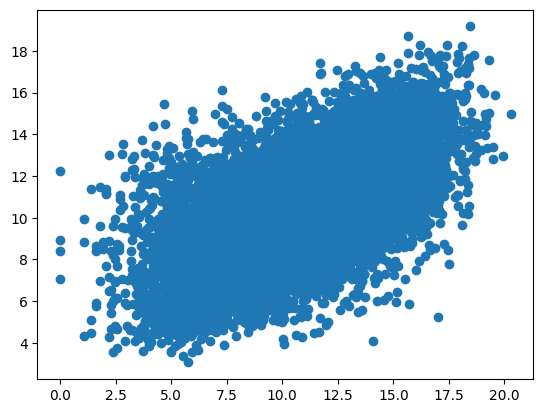

In [17]:
import matplotlib.pyplot as plt
plt.scatter(np.array(yy_test['viewcount']),predicted.reshape(-1))

In [40]:
predicted = model.predict({'input_embeddings_cc':avgem[np.array(train_text.index),:],\
         'input_ids_title':tokens_train_title['input_ids'],\
         'attention_mask_title':tokens_train_title['attention_mask'],\
         'input_ids_coverword':tokens_train_coverword['input_ids'],\
         'attention_mask_coverword':tokens_train_coverword['attention_mask'],\
         'input_control':train_text[fixed_control]})

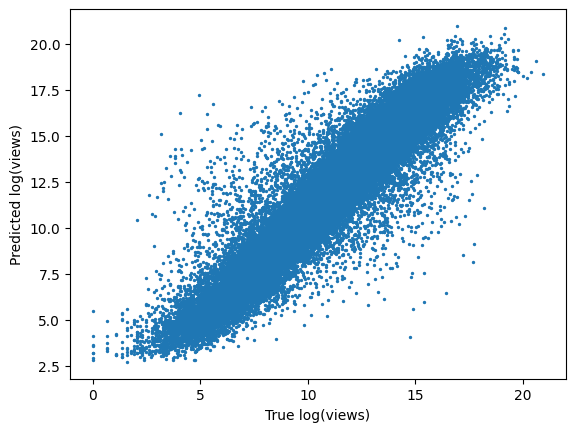

In [41]:
import matplotlib.pyplot as plt
plt.scatter(np.array(yy['viewcount']),predicted.reshape(-1),s=2)
plt.xlabel('True log(views)')
plt.ylabel('Predicted log(views)')
plt.savefig('train.png')